In [1]:
import pandas as pd
df = pd.read_csv("/content/weather_by_cities.csv")
df

,day,city,temperature,windspeed,event
0,01-01-17,02-01-17,32,6,Rain
1,01-02-17,new york,36,7,Sunny
2,01-03-17,new york,28,12,Snow
3,01-04-17,new york,33,7,Sunny
4,01-01-17,mumbai,90,5,Sunny
5,01-02-17,mumbai,85,12,Fog
6,01-03-17,mumbai,87,15,Fog
7,01-04-17,mumbai,92,5,Rain
8,01-01-17,paris,45,20,Sunny
9,01-02-17,paris,50,13,Cloudy


In [2]:
g = df.groupby("city")
g

In [3]:
for city, data in g:
    print("city:",city)
    print("\n")
    print("data:",data)

city: 02-01-17


data:         day      city  temperature  windspeed event
0  01-01-17  02-01-17           32          6  Rain
city: mumbai


data:         day    city  temperature  windspeed  event
4  01-01-17  mumbai           90          5  Sunny
5  01-02-17  mumbai           85         12    Fog
6  01-03-17  mumbai           87         15    Fog
7  01-04-17  mumbai           92          5   Rain
city: new york


data:         day      city  temperature  windspeed  event
1  01-02-17  new york           36          7  Sunny
2  01-03-17  new york           28         12   Snow
3  01-04-17  new york           33          7  Sunny
city: paris


data:          day   city  temperature  windspeed   event
8   01-01-17  paris           45         20   Sunny
9   01-02-17  paris           50         13  Cloudy
10  01-03-17  paris           54          8  Cloudy
11  01-04-17  paris           42         10  Cloudy


In [4]:
g.get_group('mumbai')

,day,city,temperature,windspeed,event
4,01-01-17,mumbai,90,5,Sunny
5,01-02-17,mumbai,85,12,Fog
6,01-03-17,mumbai,87,15,Fog
7,01-04-17,mumbai,92,5,Rain


In [5]:
g.max()

,day,temperature,windspeed,event
city,,,,
02-01-17,01-01-17,32,6,Rain
mumbai,01-04-17,92,15,Sunny
new york,01-04-17,36,12,Sunny
paris,01-04-17,54,20,Sunny


In [6]:
g.mean()

,temperature,windspeed
city,,
02-01-17,32.000000,6.000000
mumbai,88.500000,9.250000
new york,32.333333,8.666667
paris,47.750000,12.750000


In [7]:
g.min()

,day,temperature,windspeed,event
city,,,,
02-01-17,01-01-17,32,6,Rain
mumbai,01-01-17,85,5,Fog
new york,01-02-17,28,7,Snow
paris,01-01-17,42,8,Cloudy


In [8]:
g.describe()

temperature                             ... windspeed                   
               count       mean       std   min  ...       25%   50%    75%   max
city                                             ...                             
02-01-17         1.0  32.000000       NaN  32.0  ...       6.0   6.0   6.00   6.0
mumbai           4.0  88.500000  3.109126  85.0  ...       5.0   8.5  12.75  15.0
new york         3.0  32.333333  4.041452  28.0  ...       7.0   7.0   9.50  12.0
paris            4.0  47.750000  5.315073  42.0  ...       9.5  11.5  14.75  20.0

[4 rows x 16 columns]

In [9]:
g.size()

city
02-01-17    1
mumbai      4
new york    3
paris       4
dtype: int64

In [10]:
g.count()

,day,temperature,windspeed,event
city,,,,
02-01-17,1,1,1,1
mumbai,4,4,4,4
new york,3,3,3,3
paris,4,4,4,4


city
02-01-17    AxesSubplot(0.125,0.125;0.775x0.755)
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

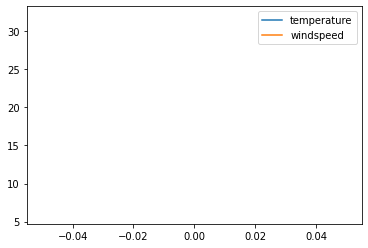

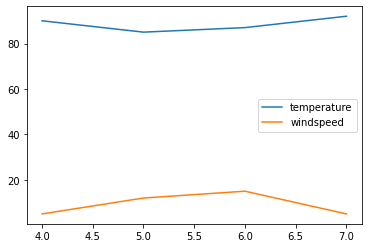

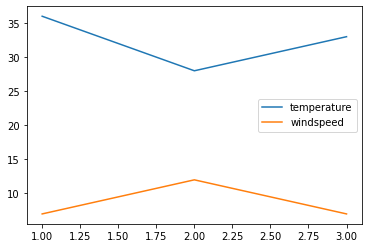

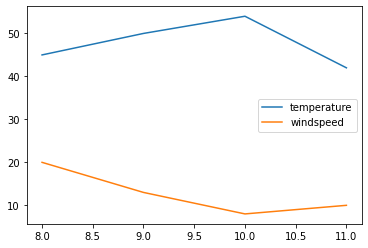

In [11]:
%matplotlib inline
g.plot()

In [12]:
def grouper(df, idx, col):
    if 80 <= df[col].loc[idx] <= 90:
        return '80-90'
    elif 50 <= df[col].loc[idx] <= 60:
        return '50-60'
    else:
        return 'others'

In [13]:
g = df.groupby(lambda x: grouper(df, x, 'temperature'))
g

In [14]:
for key, d in g:
    print("Group by Key: {}\n".format(key))
    print(d)

Group by Key: 50-60

         day   city  temperature  windspeed   event
9   01-02-17  paris           50         13  Cloudy
10  01-03-17  paris           54          8  Cloudy
Group by Key: 80-90

        day    city  temperature  windspeed  event
4  01-01-17  mumbai           90          5  Sunny
5  01-02-17  mumbai           85         12    Fog
6  01-03-17  mumbai           87         15    Fog
Group by Key: others

         day      city  temperature  windspeed   event
0   01-01-17  02-01-17           32          6    Rain
1   01-02-17  new york           36          7   Sunny
2   01-03-17  new york           28         12    Snow
3   01-04-17  new york           33          7   Sunny
7   01-04-17    mumbai           92          5    Rain
8   01-01-17     paris           45         20   Sunny
11  01-04-17     paris           42         10  Cloudy
